# 1. 

In [9]:
import numpy as np


class LinearInterpolator:

    def __init__(self, x, y):
        # y* =   y0 + (y1 - y0) / (x1 - x0) * (x* - x0) (x0 <= x* <= x1)
        #    =   (y1 - y0) / (x1 - x0) * x* + y0 - (y1 - y0) / (x1 - x0) * x0
        self.y = np.array(y)
        self.x = np.array(x)
        self.y1 = self.y[1:]
        self.y0 = self.y[:-1]
        self.x1 = self.x[1:]
        self.x0 = self.x[:-1]
        self.a = (self.y1 - self.y0) / (self.x1 - self.x0)
        self.b = self.y0 - self.a * self.x0
    def interpolate(self, x_pred):
        idx = np.searchsorted(self.x1, x_pred)
        y_pred = self.a[idx] * x_pred + self.b[idx]
        return y_pred

    def plot(self):
        import matplotlib.pyplot as plt
        plt.scatter(self.x, self.y, color='red', s=10)
        rand_x = np.linspace(self.x0[0], self.x1[-1], 500)
        rand_y = self.interpolate(rand_x)
        plt.scatter(rand_x, rand_y, s=1)
        plt.show()

    # y* = a * x* + b
    



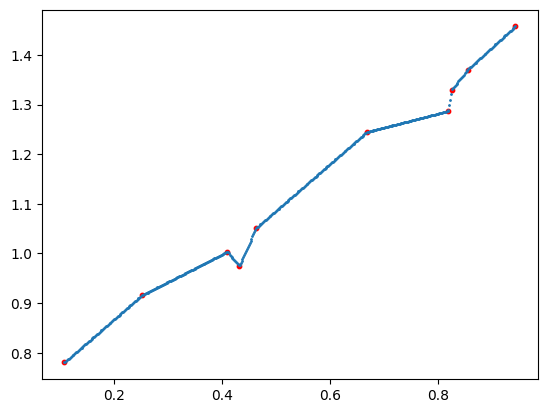

In [10]:
xarr = np.loadtxt('linear_data.txt')[:,0]
yarr = np.loadtxt('linear_data.txt')[:,1]

interp_1d = LinearInterpolator(xarr, yarr)
interp_1d.plot()

#   2.

In [14]:
def covariance(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    var_x = np.sum((x - x_mean)**2) / len(x)
    var_y = np.sum((y - y_mean)**2) / len(y)
    cov = np.sum((x - x_mean) * (y - y_mean)) / len(x)
    cov_mat = np.array([[var_x, cov],
                        [cov, var_y]])
    return cov_mat

mean_x = 0.002945999999999998 , var_x = 1.1017790790839999
mean_y = -0.699904 , var_y = 0.104417434784
cov_xy = -0.20804744881599999
correlation_xy = -0.6133786056939231


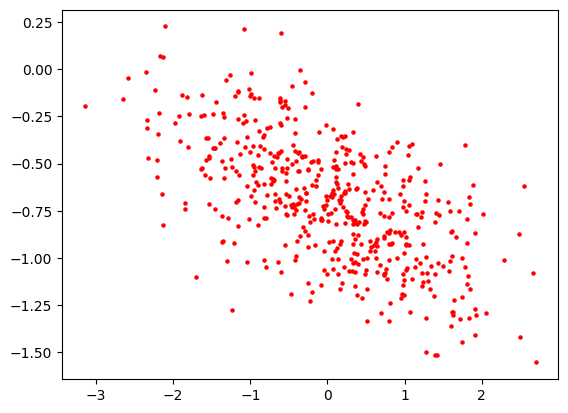

In [19]:
import matplotlib.pyplot as plt
xdata = np.loadtxt('gaussian_data_1.txt')[:,0]
ydata = np.loadtxt('gaussian_data_1.txt')[:,1]

mean_x = np.mean(xdata); var_x = np.var(xdata)
mean_y = np.mean(ydata); var_y = np.var(ydata)
cov_mat = covariance(xdata, ydata)
cov_xy = cov_mat[0,1]

print("mean_x =", mean_x, ", var_x =", var_x)
print("mean_y =", mean_y, ", var_y =", var_y)
print("cov_xy =", cov_xy)
print('correlation_xy =', cov_xy / np.sqrt(var_x * var_y))
plt.scatter(xdata, ydata, color='red', s=5)
plt.show()

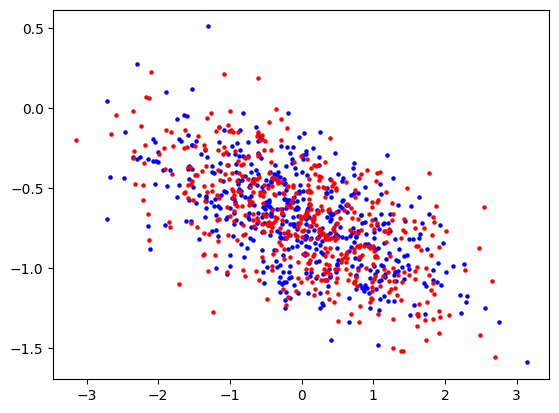

In [25]:
from numpy.random import multivariate_normal

points = multivariate_normal(mean=[mean_x, mean_y], cov = cov_mat, size=500)
plt.scatter(points[:,0], points[:,1], color='blue', s=5)
plt.scatter(xdata, ydata, color='red', s=5)
plt.show()

# 3.

In [ ]:
import numpy as np

xdata = np.loadtxt('linear_data.txt')[:,0]
ydata = np.loadtxt('linear_data.txt')[:,1]
error = np.loadtxt('linear_data.txt')[:,2]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(xdata., ydata)
gpr.score(X, y)
gpr.predict(X[:2,:], return_std=True)

In [5]:
xdata.reshape(-1,1)

array([[0.1073],
       [0.2507],
       [0.4095],
       [0.4314],
       [0.4624],
       [0.668 ],
       [0.8186],
       [0.8256],
       [0.8546],
       [0.9429]])

In [ ]:
xdata.

array([0.1073, 0.2507, 0.4095, 0.4314, 0.4624, 0.668 , 0.8186, 0.8256,
       0.8546, 0.9429])